# **LOADING THE DATASET**

> Here I will load my dataset and access some properties, like the shape, certain columns, duplicates, null values, redundant columns, e.t.c.



In [18]:
import pandas as pd

In [19]:
df = pd.read_csv("behaviour_simulation_train.csv")

In [20]:
df.isnull().sum()

,0
id,0
date,0
likes,0
content,0
username,0
media,0
inferred company,0


In [21]:
df.duplicated().sum()

np.int64(0)

In [22]:
df.dtypes

,0
id,int64
date,object
likes,int64
content,object
username,object
media,object
inferred company,object


In [23]:
df.shape

(17331, 7)

In [24]:
df

,id,date,likes,content,username,media,inferred company
0,1,2020-12-12 00:47:00,1,"Spend your weekend morning with a Ham, Egg, an...",TimHortonsPH,[Photo(previewUrl='https://pbs.twimg.com/media...,tim hortons
1,2,2018-06-30 10:04:20,2750,Watch rapper <mention> freestyle for over an H...,IndyMusic,[Photo(previewUrl='https://pbs.twimg.com/media...,independent
2,3,2020-09-29 19:47:28,57,Canadian Armenian community demands ban on mil...,CBCCanada,[Photo(previewUrl='https://pbs.twimg.com/media...,cbc
3,4,2020-10-01 11:40:09,152,"1st in Europe to be devastated by COVID-19, It...",MKWilliamsRome,[Photo(previewUrl='https://pbs.twimg.com/media...,williams
4,5,2018-10-19 14:30:46,41,Congratulations to Pauletha Butts of <mention>...,BGISD,[Photo(previewUrl='https://pbs.twimg.com/media...,independent
...,...,...,...,...,...,...,...
17326,17327,2020-12-12 03:15:00,56,"After 66 years together, this couple died of #...",cbcnewsbc,[Video(thumbnailUrl='https://pbs.twimg.com/amp...,cbc
17327,17328,2018-02-09 21:47:11,2,Where to add wireless measurements &amp;amp; a...,EMR_Automation,[Photo(previewUrl='https://pbs.twimg.com/media...,emerson
17328,17329,2018-05-03 14:26:09,181,This is what happened outside a Bromley pollin...,Independent,[Video(thumbnailUrl='https://pbs.twimg.com/ext...,independent
17329,17330,2020-01-27 11:52:03,0,Int’l Day Of Education: CSO Sensitises Childre...,IndependentNGR,[Photo(previewUrl='https://pbs.twimg.com/media...,independent


In [25]:
for column in df.columns:
  print(column)

id
date
likes
content
username
media
inferred company


In [26]:
for col in df.columns:
  print(f"Column '{col}': {df[col].nunique()} unique values")

Column 'id': 17331 unique values
Column 'date': 17292 unique values
Column 'likes': 2589 unique values
Column 'content': 17126 unique values
Column 'username': 1325 unique values
Column 'media': 17307 unique values
Column 'inferred company': 194 unique values


In [27]:
df.describe()

,id,likes
count,17331.000000,17331.000000
mean,8666.000000,718.392130
std,5003.173093,3866.475948
min,1.000000,0.000000
25%,4333.500000,3.000000
50%,8666.000000,73.000000
75%,12998.500000,352.000000
max,17331.000000,254931.000000


# **LIGHT PREPROCESSING (FOR EDA AND DEV READINESS)**

> I will clean my dataset, of redundant columns, change the format of the date column to DateTime format and extract some features, and I will add some more features to the data frame which will help us in exploratory data analysis.



In [28]:
df['has_media'] = df['media'].apply(lambda x: x != 'no_media')
df['content'] = df['content'].astype(str).str.strip().str.lower()
df['datetime'] = pd.to_datetime(df['date'], errors='coerce')

In [29]:
df.drop(columns=['date', 'media'], inplace=True)

In [30]:
df = df.rename(columns={'id': 'Id', 'likes': 'Likes', 'content': 'Content', 'username': 'Username', 'inferred company': 'Inferred_Company', 'datetime': 'Release Time', 'has_media': 'Has_Media'})

In [31]:
from datetime import time
df['Release_Time_Year'] = df['Release Time'].dt.year
df['Release_Time_Month'] = df['Release Time'].dt.month
df['Release_Time_Day'] = df['Release Time'].dt.day
df['Release_Time_hour'] = df['Release Time'].dt.hour
df['Release_Time_minute'] = df['Release Time'].dt.minute
df['Release_Time_second'] = df['Release Time'].dt.second
df['Release_Time_Of_Day'] = df.apply(lambda row: time(row['Release_Time_hour'], row['Release_Time_minute'], row['Release_Time_second']), axis=1)
df.drop(columns = "Release Time", inplace = True)

In [32]:
df['Has_Mention'] = df['Content'].str.contains('<mention>')
import re
def emoji_count(text):
    emoji_pattern = re.compile(
        "["
        "\U0001F600-\U0001F64F"
        "\U0001F300-\U0001F5FF"
        "\U0001F680-\U0001F6FF"
        "\U0001F700-\U0001F77F"
        "\U0001F780-\U0001F7FF"
        "\U0001F800-\U0001F8FF"
        "\U0001F900-\U0001F9FF"
        "\U0001FA00-\U0001FA6F"
        "\U0001FA70-\U0001FAFF"
        "\U00002702-\U000027B0"
        "\U000024C2-\U0001F251"
        "]+"
    )
    return len(emoji_pattern.findall(text))
df['Emoji_Count'] = df['Content'].apply(emoji_count)
df['Has_Hashtag'] = df['Content'].str.contains(r'#\w+', na=False)
df['Has_Url'] = df['Content'].str.contains(r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\\(\\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', na=False)
df['Is_Weekend'] = pd.to_datetime({'year': df['Release_Time_Year'],
                                   'month': df['Release_Time_Month'],
                                   'day': df['Release_Time_Day'],
                                   'hour': df['Release_Time_hour'],
                                   'minute': df['Release_Time_minute'],
                                   'second': df['Release_Time_second']}).dt.dayofweek >= 5

In [33]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['Inferred_Company_Encoded'] = label_encoder.fit_transform(df['Inferred_Company'])
df['Has_Media'] = label_encoder.fit_transform(df['Has_Media'])
df['Has_Mention'] = label_encoder.fit_transform(df['Has_Mention'])
df['Has_Hashtag'] = label_encoder.fit_transform(df['Has_Hashtag'])
df['Has_Url'] = label_encoder.fit_transform(df['Has_Url'])
df['Is_Weekend'] = label_encoder.fit_transform(df['Is_Weekend'])
encoded_companies = df[['Inferred_Company', 'Inferred_Company_Encoded']].drop_duplicates()
encoded_companies.to_csv('inferred_company_encoded_values.csv', index=False)
df.drop(columns = ['Release_Time_minute', 'Release_Time_hour', 'Release_Time_second', 'Inferred_Company'], inplace = True)

In [34]:
from textblob import TextBlob
df['Content_Length'] = df['Content'].str.len()
df['Word_Count'] = df['Content'].str.split().str.len()
user_agg_data = df.groupby('Username')['Likes'].agg(['count', 'sum']).reset_index()
user_agg_data.columns = ['Username', 'User_Post_Count', 'Total_Likes']
user_agg_data['Average_Likes_Post'] = user_agg_data['Total_Likes'] / user_agg_data['User_Post_Count']
df = df.merge(user_agg_data[['Username', 'User_Post_Count', 'Average_Likes_Post']], on='Username', how='left')
df['Sentiment'] = df['Content'].apply(lambda x: TextBlob(x).sentiment.polarity)
new_column_order = ['Username', 'User_Post_Count', 'Average_Likes_Post', 'Content',
                    'Word_Count', 'Content_Length', 'Has_Media', 'Has_Mention', 'Release_Time_Year',
                    'Release_Time_Month', 'Release_Time_Day', 'Release_Time_Of_Day',
                    'Is_Weekend', 'Inferred_Company_Encoded', 'Sentiment', 'Likes']
df = df[new_column_order]

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17331 entries, 0 to 17330
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Username                  17331 non-null  object 
 1   User_Post_Count           17331 non-null  int64  
 2   Average_Likes_Post        17331 non-null  float64
 3   Content                   17331 non-null  object 
 4   Word_Count                17331 non-null  int64  
 5   Content_Length            17331 non-null  int64  
 6   Has_Media                 17331 non-null  int64  
 7   Has_Mention               17331 non-null  int64  
 8   Release_Time_Year         17331 non-null  int32  
 9   Release_Time_Month        17331 non-null  int32  
 10  Release_Time_Day          17331 non-null  int32  
 11  Release_Time_Of_Day       17331 non-null  object 
 12  Is_Weekend                17331 non-null  int64  
 13  Inferred_Company_Encoded  17331 non-null  int64  
 14  Sentim

In [36]:
df.describe()

,User_Post_Count,Average_Likes_Post,Word_Count,Content_Length,Has_Media,Has_Mention,Release_Time_Year,Release_Time_Month,Release_Time_Day,Is_Weekend,Inferred_Company_Encoded,Sentiment,Likes
count,17331.00000,17331.000000,17331.000000,17331.000000,17331.0,17331.000000,17331.000000,17331.000000,17331.000000,17331.000000,17331.000000,17331.000000,17331.000000
mean,310.11315,718.392130,22.501356,147.868617,0.0,0.280249,2019.085108,6.522647,15.682534,0.221049,83.462235,0.152969,718.392130
std,597.97351,2151.111797,11.842720,71.690684,0.0,0.449134,0.816360,3.462951,8.777625,0.414965,54.537641,0.266508,3866.475948
min,1.00000,0.000000,2.000000,20.000000,0.0,0.000000,2018.000000,1.000000,1.000000,0.000000,0.000000,-1.000000,0.000000
25%,16.00000,3.604651,12.000000,88.000000,0.0,0.000000,2018.000000,3.000000,8.000000,0.000000,38.000000,0.000000,3.000000
50%,49.00000,161.631579,21.000000,136.000000,0.0,0.000000,2019.000000,7.000000,16.000000,0.000000,87.000000,0.053333,73.000000
75%,162.00000,603.562500,31.000000,202.000000,0.0,1.000000,2020.000000,10.000000,23.000000,0.000000,120.000000,0.300000,352.000000
max,1927.00000,71375.500000,63.000000,323.000000,0.0,1.000000,2020.000000,12.000000,31.000000,1.000000,193.000000,1.000000,254931.000000


In [37]:
for col in df.columns:
  print(f"Column '{col}': {df[col].nunique()} unique values")

Column 'Username': 1325 unique values
Column 'User_Post_Count': 93 unique values
Column 'Average_Likes_Post': 1094 unique values
Column 'Content': 17124 unique values
Column 'Word_Count': 60 unique values
Column 'Content_Length': 288 unique values
Column 'Has_Media': 1 unique values
Column 'Has_Mention': 2 unique values
Column 'Release_Time_Year': 3 unique values
Column 'Release_Time_Month': 12 unique values
Column 'Release_Time_Day': 31 unique values
Column 'Release_Time_Of_Day': 13183 unique values
Column 'Is_Weekend': 2 unique values
Column 'Inferred_Company_Encoded': 194 unique values
Column 'Sentiment': 2142 unique values
Column 'Likes': 2589 unique values


In [38]:
import numpy as np
df['Log_Likes'] = np.log(df['Likes'] + 1)

<ipython-input-38-442408419>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Log_Likes'] = np.log(df['Likes'] + 1)


In [39]:
df['Has_Media'].value_counts()

,count
Has_Media,
0,17331


In [40]:
df.drop(columns = ['Has_Media'], inplace = True)

<ipython-input-40-2532181239>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns = ['Has_Media'], inplace = True)


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17331 entries, 0 to 17330
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Username                  17331 non-null  object 
 1   User_Post_Count           17331 non-null  int64  
 2   Average_Likes_Post        17331 non-null  float64
 3   Content                   17331 non-null  object 
 4   Word_Count                17331 non-null  int64  
 5   Content_Length            17331 non-null  int64  
 6   Has_Mention               17331 non-null  int64  
 7   Release_Time_Year         17331 non-null  int32  
 8   Release_Time_Month        17331 non-null  int32  
 9   Release_Time_Day          17331 non-null  int32  
 10  Release_Time_Of_Day       17331 non-null  object 
 11  Is_Weekend                17331 non-null  int64  
 12  Inferred_Company_Encoded  17331 non-null  int64  
 13  Sentiment                 17331 non-null  float64
 14  Likes 

In [42]:
df.to_excel('Cleaned_Dataset.xlsx', index=False)

# **EXPLORATORY DATA ANALYSIS**

> Here I will explore the dataset, by plotting some bar graphs, histograms, line charts and more, to compare the number of likes to the features in my data.

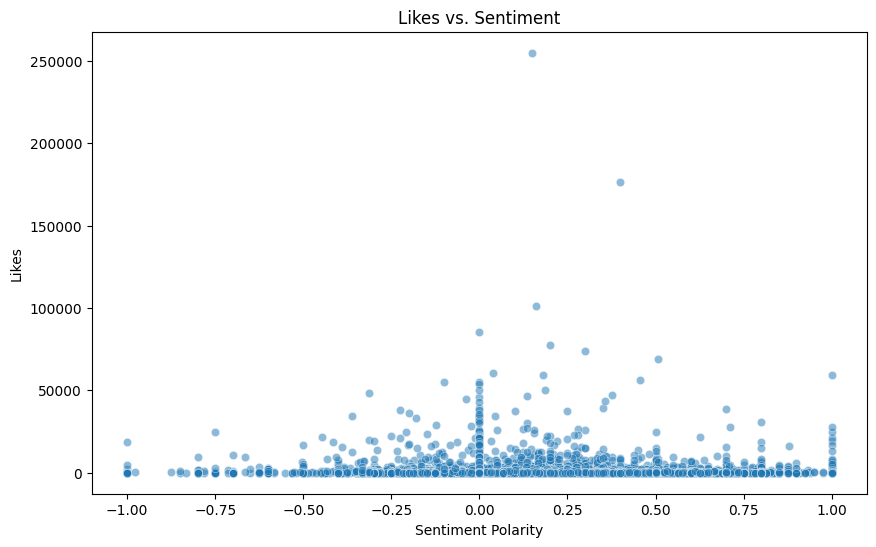

<ipython-input-43-2884293791>:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_likes_by_sentiment = df.groupby(sentiment_bins)['Likes'].mean().reset_index()


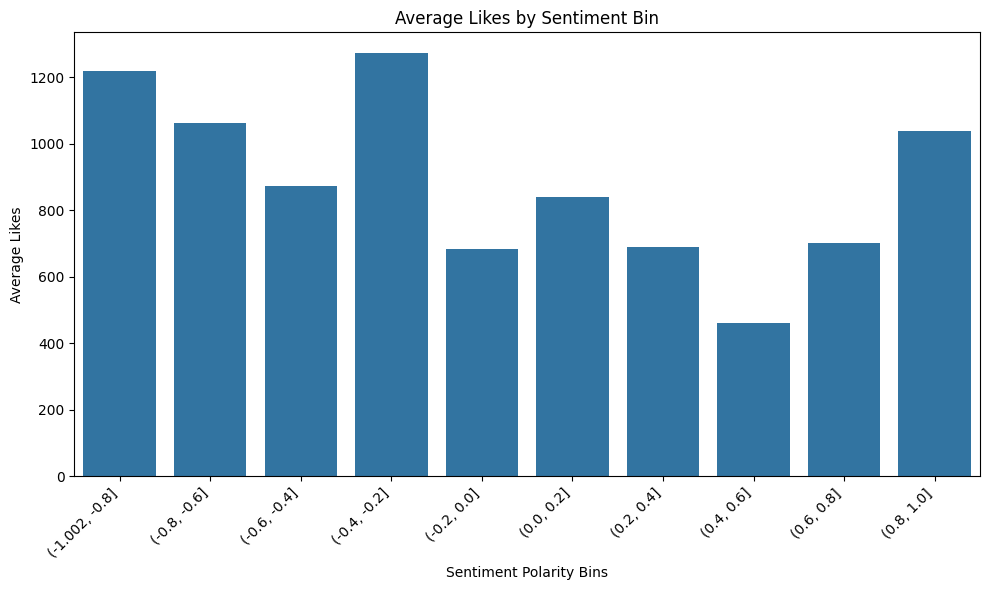

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Sentiment', y='Likes', data=df, alpha=0.5)
plt.title('Likes vs. Sentiment')
plt.xlabel('Sentiment Polarity')
plt.ylabel('Likes')
plt.show()
sentiment_bins = pd.cut(df['Sentiment'], bins=10)
avg_likes_by_sentiment = df.groupby(sentiment_bins)['Likes'].mean().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(x='Sentiment', y='Likes', data=avg_likes_by_sentiment)
plt.title('Average Likes by Sentiment Bin')
plt.xlabel('Sentiment Polarity Bins')
plt.ylabel('Average Likes')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

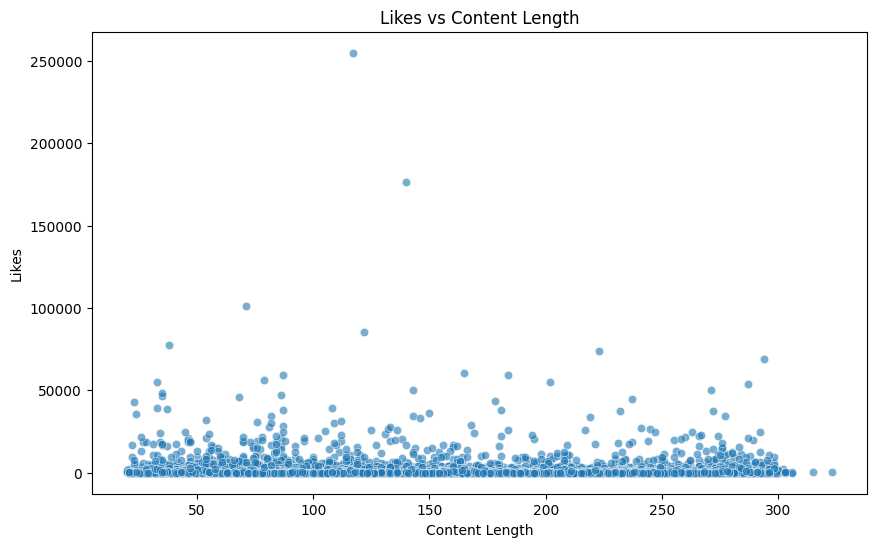

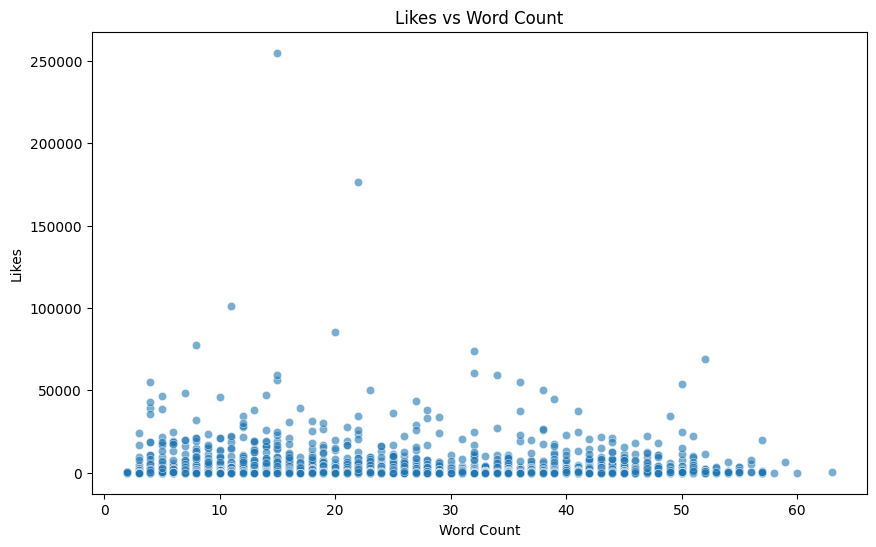

In [44]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Content_Length', y='Likes', data=df, alpha=0.6)
plt.title('Likes vs Content Length')
plt.xlabel('Content Length')
plt.ylabel('Likes')
plt.show()
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Word_Count', y='Likes', data=df, alpha=0.6)
plt.title('Likes vs Word Count')
plt.xlabel('Word Count')
plt.ylabel('Likes')
plt.show()

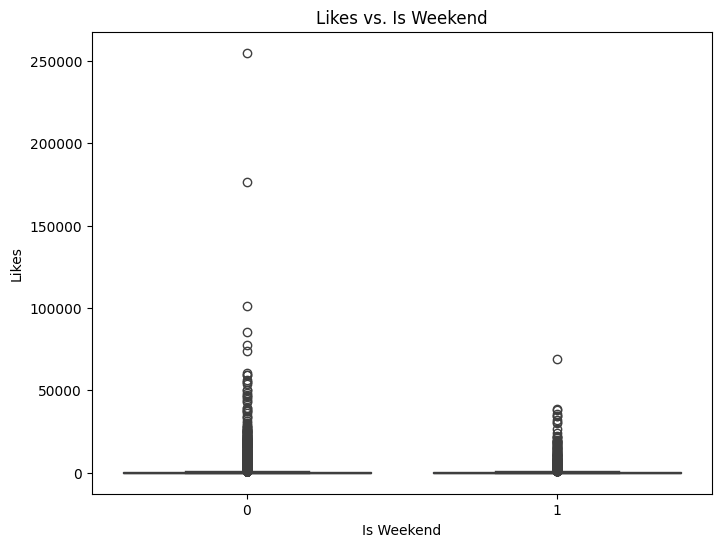

In [45]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Is_Weekend', y='Likes', data=df)
plt.title('Likes vs. Is Weekend')
plt.xlabel('Is Weekend')
plt.ylabel('Likes')
plt.show()

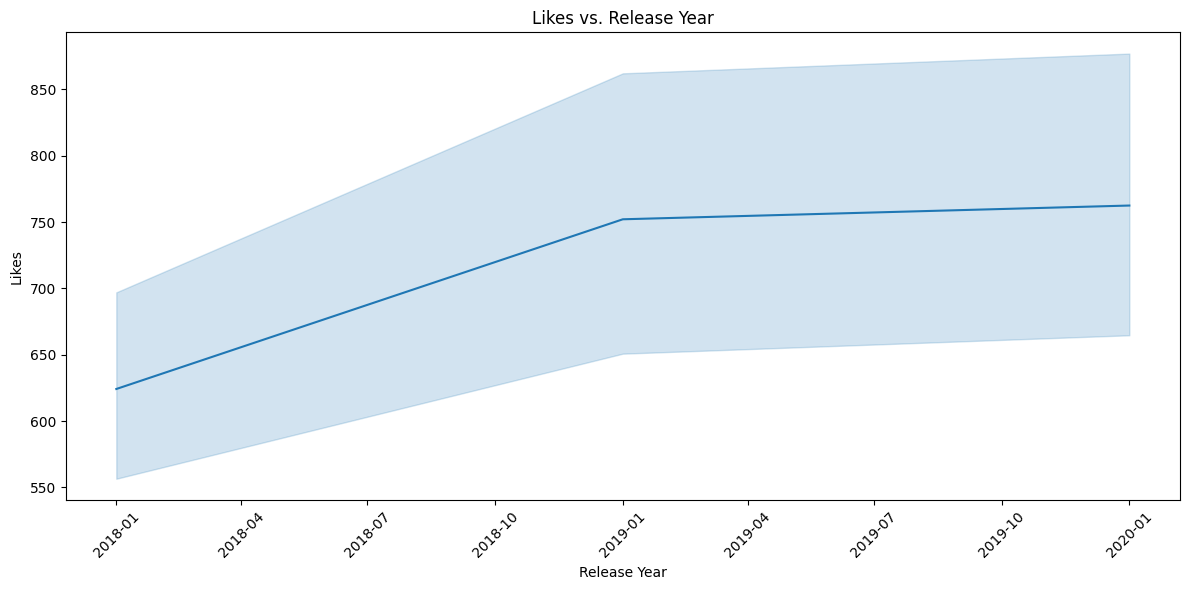

In [46]:
df['release_year_date'] = pd.to_datetime(df['Release_Time_Year'].astype(str) + '-01-01')
plt.figure(figsize=(12, 6))
sns.lineplot(x='release_year_date', y='Likes', data=df)
plt.title('Likes vs. Release Year')
plt.xlabel('Release Year')
plt.ylabel('Likes')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
df.drop(columns = "release_year_date",inplace = True)

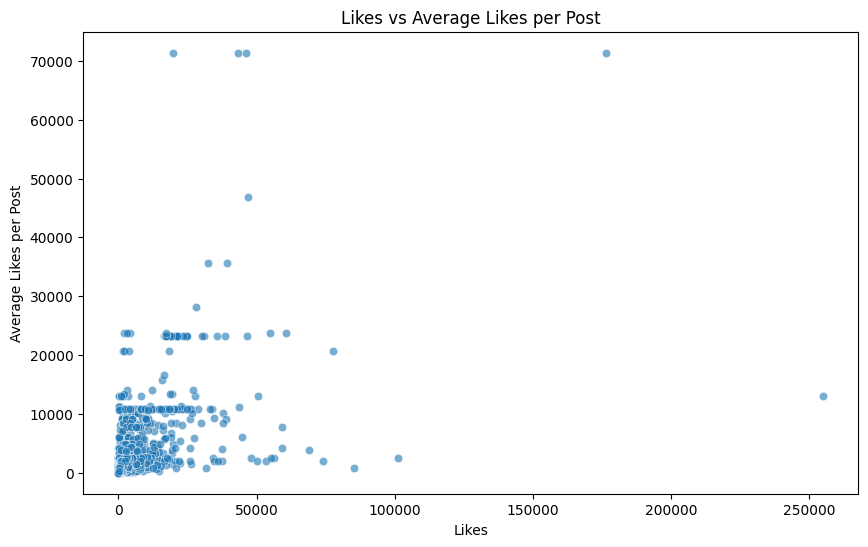

In [47]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Likes', y='Average_Likes_Post', data=df, alpha=0.6)
plt.title('Likes vs Average Likes per Post')
plt.xlabel('Likes')
plt.ylabel('Average Likes per Post')
plt.show()

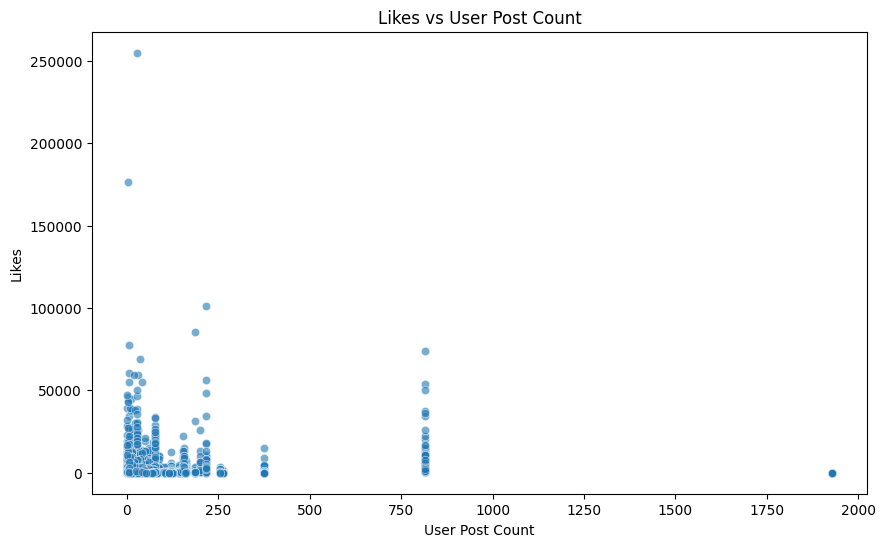

In [48]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='User_Post_Count', y='Likes', data=df, alpha=0.6)
plt.title('Likes vs User Post Count')
plt.xlabel('User Post Count')
plt.ylabel('Likes')
plt.show()

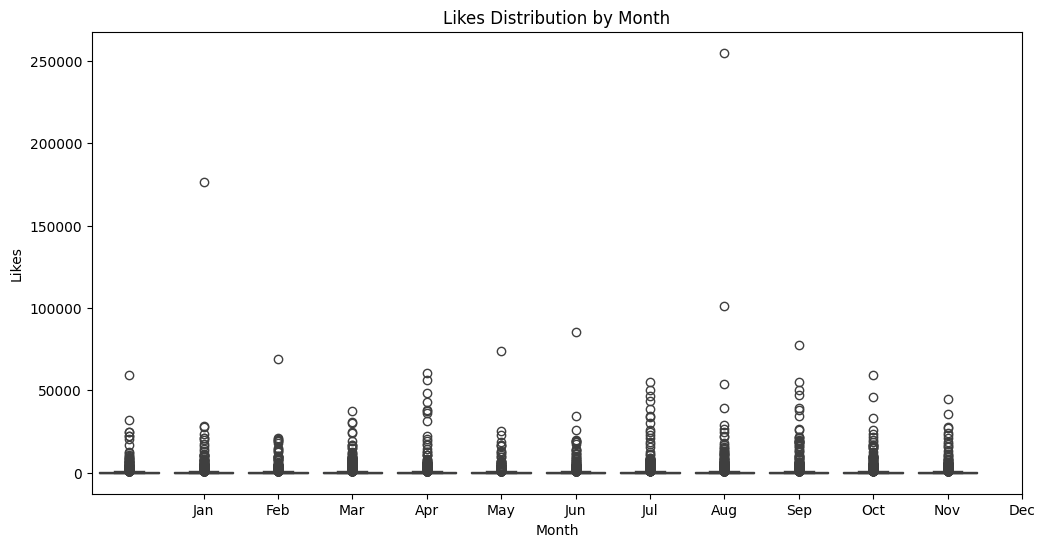

In [49]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Release_Time_Month', y='Likes', data=df)
plt.title('Likes Distribution by Month')
plt.xlabel('Month')
plt.ylabel('Likes')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()

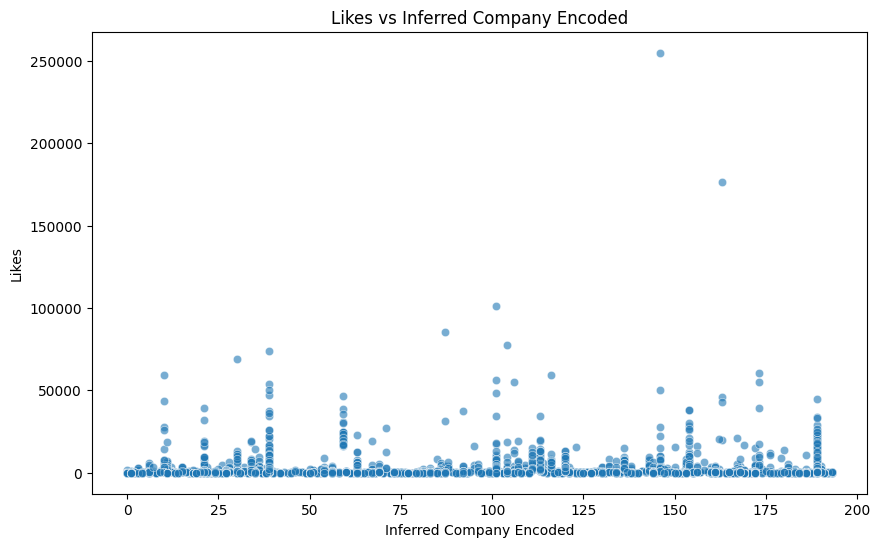

In [50]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Inferred_Company_Encoded', y='Likes', data=df, alpha=0.6)
plt.title('Likes vs Inferred Company Encoded')
plt.xlabel('Inferred Company Encoded')
plt.ylabel('Likes')
plt.show()

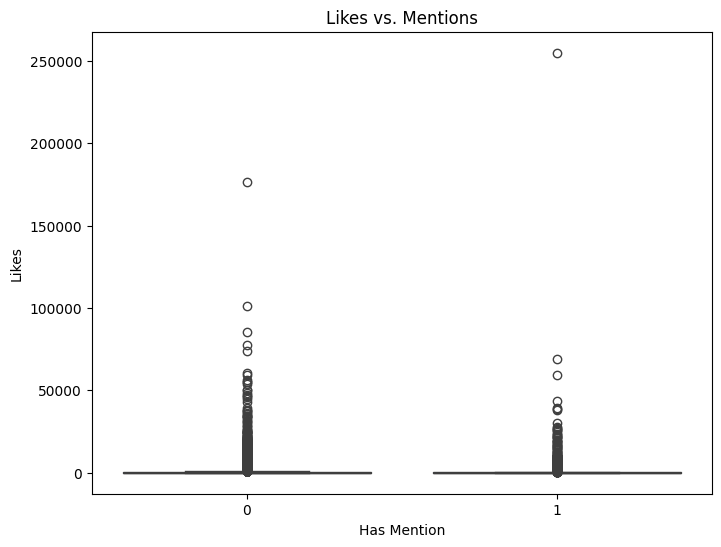

In [51]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Has_Mention', y='Likes', data=df)
plt.title('Likes vs. Mentions')
plt.xlabel('Has Mention')
plt.ylabel('Likes')
plt.show()

Correlation Matrix of Log_Likes vs remaining numerical columns:
User_Post_Count            -0.423433
Average_Likes_Post          0.433754
Word_Count                  0.138015
Content_Length              0.089585
Has_Mention                 0.074083
Release_Time_Year          -0.063429
Release_Time_Month          0.028296
Release_Time_Day           -0.003694
Is_Weekend                  0.052465
Inferred_Company_Encoded    0.110186
Sentiment                   0.011674
Likes                       0.336056
Name: Log_Likes, dtype: float64


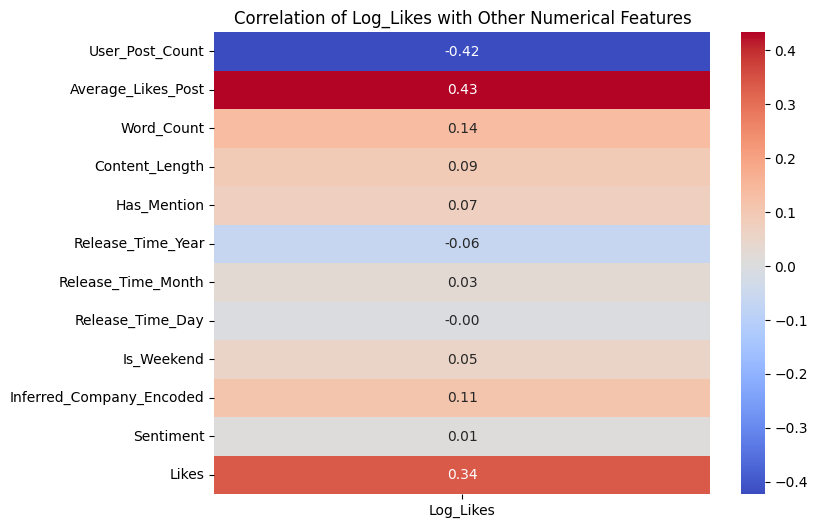

In [52]:
correlation_matrix = df.select_dtypes(include=np.number).corr()['Log_Likes'].drop('Log_Likes')
print("Correlation Matrix of Log_Likes vs remaining numerical columns:")
print(correlation_matrix)
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix.to_frame(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation of Log_Likes with Other Numerical Features')
plt.show()

# **TRAINING AND STORING THE MODEL**

> Here I will train my model using various model types, like linear regression, gradient boosting, neural networks and many more. Then I will choose the model that yields the best results and save it.



## DATA PREPARATION

> I will prepare my data, first split the dataset with 75% training data and 25% testing data. Next I will split the columns with likes representing the y column (The value to be predicted) and the remaining columns representing the independent variables.

In [53]:
y = df['Log_Likes']
x = df.drop(columns=['Log_Likes'], axis = 1)
numerical_cols = [
    'Average_Likes_Post',
    'User_Post_Count',
    'Word_Count',
    'Inferred_Company_Encoded',
    'Content_Length',
    'Has_Mention',
    'Is_Weekend',
    'Release_Time_Year'
]

In [54]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x , y, test_size=0.25, random_state=42)

## TESTING ALGORITHMS



> First I will normalize my data, then I will test various algorithms, test their accuracy, and choose the best one.



### NORMALIZED DATA

In [55]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_normalized = x_train.copy()
x_test_normalized = x_test.copy()
x_train_normalized[numerical_cols] = scaler.fit_transform(x_train[numerical_cols])
x_test_normalized[numerical_cols] = scaler.transform(x_test[numerical_cols])

### LINEAR REGRESSION

In [56]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
lr_model = LinearRegression()
lr_model.fit(x_train_normalized[numerical_cols], y_train)
y_pred_lr = lr_model.predict(x_test_normalized[numerical_cols])
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)
print("Linear Regression Model Evaluation:")
print(f"Mean Squared Error (MSE): {mse_lr:.2f}")
print(f"R-squared (R2): {r2_lr:.2f}")

Linear Regression Model Evaluation:
Mean Squared Error (MSE): 4.38
R-squared (R2): 0.36


### RANDOM FOREST

In [57]:
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(n_estimators=1000, random_state=42)
rf_model.fit(x_train[numerical_cols], y_train)
y_pred_rf = rf_model.predict(x_test[numerical_cols])
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
print("Random Forest Regressor Model Evaluation:")
print(f"Mean Squared Error (RMSE): {mse_rf:.2f}")
print(f"R-squared (R2): {r2_rf:.2f}")

Random Forest Regressor Model Evaluation:
Mean Squared Error (RMSE): 0.73
R-squared (R2): 0.89


### GRADIENT BOOSTING

In [58]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
gbr_model = GradientBoostingRegressor(n_estimators=1000, learning_rate=0.1, max_depth=3, random_state=42)
gbr_model.fit(x_train[numerical_cols], y_train)
y_pred_gbr = gbr_model.predict(x_test[numerical_cols])
mse_gbr = mean_squared_error(y_test, y_pred_gbr)
r2_gbr = r2_score(y_test, y_pred_gbr)
print("Gradient Boosting Regressor Model Evaluation:")
print(f"Mean Squared Error (RMSE): {mse_gbr:.2f}")
print(f"R-squared (R2): {r2_gbr:.2f}")

Gradient Boosting Regressor Model Evaluation:
Mean Squared Error (RMSE): 0.72
R-squared (R2): 0.90


### NEURAL NETWORKS

In [59]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
model = Sequential()
model.add(Dense(128, input_dim=len(numerical_cols), activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='linear'))
optimizer = Adam(learning_rate=0.001)
model.compile(loss='mse', optimizer=optimizer)
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
history = model.fit(x_train_normalized[numerical_cols], y_train,
                    validation_split=0.2,
                    epochs=200,
                    batch_size=32,
                    callbacks=[early_stopping],
                    verbose=0)
loss_nn = model.evaluate(x_test_normalized[numerical_cols], y_test, verbose=0)
y_pred_nn = model.predict(x_test_normalized[numerical_cols])
from sklearn.metrics import r2_score
r2_nn = r2_score(y_test, y_pred_nn)
print("\nNeural Network Model Evaluation:")
print(f"Mean Squared Error (MSE): {loss_nn:.2f}")
print(f"R-squared (R2): {r2_nn:.2f}")

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

Neural Network Model Evaluation:
Mean Squared Error (MSE): 0.92
R-squared (R2): 0.87


### TABULAR TRANSFORMS

In [60]:
!pip install pytorch-tabnet -q
import torch
import numpy as np
import pandas as pd
from pytorch_tabnet.tab_model import TabNetRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score
categorical_features = ['Has_Mention', 'Is_Weekend', 'Release_Time_Year',
                        'Release_Time_Month', 'Release_Time_Day', 'Inferred_Company_Encoded']
numerical_features = ['Average_Likes_Post', 'User_Post_Count', 'Word_Count',
                      'Content_Length', 'Sentiment']
features = numerical_features + categorical_features
target = 'Log_Likes'
X_train_tab = x_train[features].copy()
X_test_tab = x_test[features].copy()
y_train_tab = y_train.copy()
y_test_tab = y_test.copy()
full_data = pd.concat([X_train_tab, X_test_tab], axis=0)
for col in categorical_features:
    le = LabelEncoder()
    le.fit(full_data[col])
    X_train_tab[col] = le.transform(X_train_tab[col])
    X_test_tab[col] = le.transform(X_test_tab[col])
scaler = StandardScaler()
X_train_tab[numerical_features] = scaler.fit_transform(X_train_tab[numerical_features])
X_test_tab[numerical_features] = scaler.transform(X_test_tab[numerical_features])
categorical_dims = [full_data[col].nunique() for col in categorical_features]
cat_idxs = [X_train_tab.columns.get_loc(col) for col in categorical_features]
cat_emb_dim = [min(50, (dim // 2) + 1) for dim in categorical_dims]
tabnet_model = TabNetRegressor(
    cat_idxs=cat_idxs,
    cat_dims=categorical_dims,
    cat_emb_dim=cat_emb_dim,
    optimizer_fn=torch.optim.Adam,
    optimizer_params=dict(lr=2e-2),
    scheduler_params={"step_size":50, "gamma":0.9},
    scheduler_fn=torch.optim.lr_scheduler.StepLR,
    mask_type='sparsemax'
)
X_train_np = X_train_tab.values
X_test_np = X_test_tab.values
y_train_np = y_train_tab.values.reshape(-1, 1)
y_test_np = y_test_tab.values.reshape(-1, 1)
tabnet_model.fit(
    X_train=X_train_np, y_train=y_train_np,
    eval_set=[(X_test_np, y_test_np)],
    eval_metric=['mse'],
    max_epochs=1000,
    patience=50,
    batch_size=1024,
    virtual_batch_size=128,
    num_workers=0,
    drop_last=False
)
y_pred = tabnet_model.predict(X_test_np)
mse = mean_squared_error(y_test_np, y_pred)
r2 = r2_score(y_test_np, y_pred)
print("\n📊 TabNet Evaluation Metrics:")
print(f"✅ Mean Squared Error (MSE): {mse:.2f}")
print(f"✅ R-squared Score (R²): {r2:.2f}")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.5/44.5 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 92.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 80.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 56.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 14.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 8.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 23.0 MB/s eta 0:00:00


/usr/local/lib/python3.11/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 9.6407  | val_0_mse: 5.46592 |  0:00:01s
epoch 1  | loss: 4.10906 | val_0_mse: 3.6752  |  0:00:02s
epoch 2  | loss: 2.43604 | val_0_mse: 2.36761 |  0:00:03s
epoch 3  | loss: 1.66853 | val_0_mse: 2.76034 |  0:00:03s
epoch 4  | loss: 1.41725 | val_0_mse: 3.34481 |  0:00:04s
epoch 5  | loss: 1.33007 | val_0_mse: 1.54035 |  0:00:05s
epoch 6  | loss: 1.1197  | val_0_mse: 3.14923 |  0:00:05s
epoch 7  | loss: 1.06123 | val_0_mse: 2.93619 |  0:00:06s
epoch 8  | loss: 1.02114 | val_0_mse: 3.95188 |  0:00:07s
epoch 9  | loss: 0.98628 | val_0_mse: 3.1481  |  0:00:07s
epoch 10 | loss: 0.96606 | val_0_mse: 3.56295 |  0:00:08s
epoch 11 | loss: 0.95151 | val_0_mse: 3.38783 |  0:00:09s
epoch 12 | loss: 0.91869 | val_0_mse: 2.93638 |  0:00:10s
epoch 13 | loss: 0.92224 | val_0_mse: 3.37545 |  0:00:11s
epoch 14 | loss: 0.89167 | val_0_mse: 3.37287 |  0:00:12s
epoch 15 | loss: 0.9591  | val_0_mse: 4.05188 |  0:00:12s
epoch 16 | loss: 0.89315 | val_0_mse: 3.53909 |  0:00:13s
epoch 17 | los

/usr/local/lib/python3.11/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)



📊 TabNet Evaluation Metrics:
✅ Mean Squared Error (MSE): 1.54
✅ R-squared Score (R²): 0.78


## STORING THE MODEL
> I will store the best-performing model, Gradient Boosting Regressor, in my case, and implement it in future algorithms.

In [61]:
import joblib
joblib.dump(gbr_model, 'like_predictor.pkl')

['like_predictor.pkl']